In [1]:
from __future__ import division
from __future__ import print_function

import argparse

import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [2]:
def load(path_list):
    load_data = (lambda path: librosa.load(path)[0])
    data = list(map(load_data, path_list))
    return data

In [3]:
def feature_extraction(data):
    """
    wavファイルのリストから特徴抽出を行い，リストで返す
    扱う特徴量はMFCC13次元の平均（0次は含めない）
    Args:
        path_list: 特徴抽出するファイルのパスリスト
    Returns:
        features: 特徴量
    """
    features = np.array([np.mean(librosa.feature.mfcc(y=y, n_mfcc=20), axis=1) for y in data])

    return features

In [4]:
training = pd.read_csv("../training.csv")
test = pd.read_csv("../test.csv")

In [5]:
# 学習データの読み込み
train_data = load("../" + training["path"].values)
test_data = load("../" + test["path"].values)

In [6]:
# データの特徴抽出
X_train = feature_extraction(train_data)
X_test = feature_extraction(test_data)
Y_train = np.array(training["label"])

In [7]:
# 学習データを学習データとバリデーションデータに分割 (バリデーションセットを20%とした例)
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X_train, Y_train,
    test_size=0.2,
    random_state=20200616,
)

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train = scaler.transform(X_train)
x_valid = scaler.transform(X_valid)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(np.array(Y_train)).long()
x_valid = torch.from_numpy(x_valid).float()
y_valid = torch.from_numpy(np.array(Y_valid)).long()

train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)

Epoch [1/300], Loss: 0.2876, val_loss: 0.2895, val_acc: 0.2019
Epoch [2/300], Loss: 0.2871, val_loss: 0.2890, val_acc: 0.3241
Epoch [3/300], Loss: 0.2866, val_loss: 0.2885, val_acc: 0.3722
Epoch [4/300], Loss: 0.2860, val_loss: 0.2878, val_acc: 0.3981
Epoch [5/300], Loss: 0.2852, val_loss: 0.2869, val_acc: 0.3907
Epoch [6/300], Loss: 0.2841, val_loss: 0.2855, val_acc: 0.3833
Epoch [7/300], Loss: 0.2823, val_loss: 0.2830, val_acc: 0.3407
Epoch [8/300], Loss: 0.2794, val_loss: 0.2792, val_acc: 0.3241
Epoch [9/300], Loss: 0.2759, val_loss: 0.2755, val_acc: 0.3407
Epoch [10/300], Loss: 0.2721, val_loss: 0.2717, val_acc: 0.3519
Epoch [11/300], Loss: 0.2679, val_loss: 0.2679, val_acc: 0.3852
Epoch [12/300], Loss: 0.2635, val_loss: 0.2642, val_acc: 0.3981
Epoch [13/300], Loss: 0.2592, val_loss: 0.2605, val_acc: 0.4444
Epoch [14/300], Loss: 0.2549, val_loss: 0.2567, val_acc: 0.4907
Epoch [15/300], Loss: 0.2509, val_loss: 0.2531, val_acc: 0.5278
Epoch [16/300], Loss: 0.2470, val_loss: 0.2496, v

Epoch [129/300], Loss: 0.1860, val_loss: 0.1900, val_acc: 0.9648
Epoch [130/300], Loss: 0.1860, val_loss: 0.1901, val_acc: 0.9667
Epoch [131/300], Loss: 0.1860, val_loss: 0.1900, val_acc: 0.9648
Epoch [132/300], Loss: 0.1859, val_loss: 0.1900, val_acc: 0.9648
Epoch [133/300], Loss: 0.1859, val_loss: 0.1901, val_acc: 0.9667
Epoch [134/300], Loss: 0.1859, val_loss: 0.1901, val_acc: 0.9667
Epoch [135/300], Loss: 0.1858, val_loss: 0.1899, val_acc: 0.9630
Epoch [136/300], Loss: 0.1858, val_loss: 0.1900, val_acc: 0.9648
Epoch [137/300], Loss: 0.1858, val_loss: 0.1899, val_acc: 0.9685
Epoch [138/300], Loss: 0.1858, val_loss: 0.1898, val_acc: 0.9630
Epoch [139/300], Loss: 0.1857, val_loss: 0.1899, val_acc: 0.9667
Epoch [140/300], Loss: 0.1857, val_loss: 0.1899, val_acc: 0.9685
Epoch [141/300], Loss: 0.1857, val_loss: 0.1899, val_acc: 0.9685
Epoch [142/300], Loss: 0.1857, val_loss: 0.1898, val_acc: 0.9685
Epoch [143/300], Loss: 0.1856, val_loss: 0.1898, val_acc: 0.9685
Epoch [144/300], Loss: 0.

Epoch [256/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [257/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [258/300], Loss: 0.1843, val_loss: 0.1888, val_acc: 0.9685
Epoch [259/300], Loss: 0.1843, val_loss: 0.1888, val_acc: 0.9685
Epoch [260/300], Loss: 0.1843, val_loss: 0.1886, val_acc: 0.9685
Epoch [261/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [262/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [263/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [264/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [265/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [266/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [267/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [268/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [269/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [270/300], Loss: 0.1843, val_loss: 0.1887, val_acc: 0.9685
Epoch [271/300], Loss: 0.

Epoch [85/300], Loss: 0.0979, val_loss: 0.0992, val_acc: 0.9352
Epoch [86/300], Loss: 0.0978, val_loss: 0.0990, val_acc: 0.9370
Epoch [87/300], Loss: 0.0977, val_loss: 0.0989, val_acc: 0.9370
Epoch [88/300], Loss: 0.0977, val_loss: 0.0988, val_acc: 0.9370
Epoch [89/300], Loss: 0.0976, val_loss: 0.0987, val_acc: 0.9370
Epoch [90/300], Loss: 0.0975, val_loss: 0.0986, val_acc: 0.9389
Epoch [91/300], Loss: 0.0974, val_loss: 0.0985, val_acc: 0.9426
Epoch [92/300], Loss: 0.0973, val_loss: 0.0984, val_acc: 0.9426
Epoch [93/300], Loss: 0.0972, val_loss: 0.0984, val_acc: 0.9444
Epoch [94/300], Loss: 0.0972, val_loss: 0.0982, val_acc: 0.9463
Epoch [95/300], Loss: 0.0970, val_loss: 0.0982, val_acc: 0.9463
Epoch [96/300], Loss: 0.0970, val_loss: 0.0981, val_acc: 0.9463
Epoch [97/300], Loss: 0.0969, val_loss: 0.0980, val_acc: 0.9500
Epoch [98/300], Loss: 0.0968, val_loss: 0.0979, val_acc: 0.9463
Epoch [99/300], Loss: 0.0968, val_loss: 0.0978, val_acc: 0.9500
Epoch [100/300], Loss: 0.0967, val_loss:

Epoch [213/300], Loss: 0.0934, val_loss: 0.0951, val_acc: 0.9630
Epoch [214/300], Loss: 0.0933, val_loss: 0.0951, val_acc: 0.9630
Epoch [215/300], Loss: 0.0933, val_loss: 0.0951, val_acc: 0.9611
Epoch [216/300], Loss: 0.0933, val_loss: 0.0950, val_acc: 0.9630
Epoch [217/300], Loss: 0.0933, val_loss: 0.0951, val_acc: 0.9630
Epoch [218/300], Loss: 0.0933, val_loss: 0.0950, val_acc: 0.9630
Epoch [219/300], Loss: 0.0933, val_loss: 0.0950, val_acc: 0.9630
Epoch [220/300], Loss: 0.0933, val_loss: 0.0950, val_acc: 0.9611
Epoch [221/300], Loss: 0.0933, val_loss: 0.0950, val_acc: 0.9611
Epoch [222/300], Loss: 0.0933, val_loss: 0.0950, val_acc: 0.9648
Epoch [223/300], Loss: 0.0932, val_loss: 0.0950, val_acc: 0.9630
Epoch [224/300], Loss: 0.0932, val_loss: 0.0950, val_acc: 0.9648
Epoch [225/300], Loss: 0.0932, val_loss: 0.0950, val_acc: 0.9667
Epoch [226/300], Loss: 0.0932, val_loss: 0.0950, val_acc: 0.9630
Epoch [227/300], Loss: 0.0932, val_loss: 0.0950, val_acc: 0.9648
Epoch [228/300], Loss: 0.

Epoch [41/300], Loss: 0.0669, val_loss: 0.0670, val_acc: 0.3981
Epoch [42/300], Loss: 0.0666, val_loss: 0.0668, val_acc: 0.4056
Epoch [43/300], Loss: 0.0663, val_loss: 0.0666, val_acc: 0.4074
Epoch [44/300], Loss: 0.0660, val_loss: 0.0663, val_acc: 0.4167
Epoch [45/300], Loss: 0.0657, val_loss: 0.0661, val_acc: 0.4185
Epoch [46/300], Loss: 0.0655, val_loss: 0.0659, val_acc: 0.4278
Epoch [47/300], Loss: 0.0652, val_loss: 0.0657, val_acc: 0.4370
Epoch [48/300], Loss: 0.0649, val_loss: 0.0654, val_acc: 0.4389
Epoch [49/300], Loss: 0.0647, val_loss: 0.0652, val_acc: 0.4463
Epoch [50/300], Loss: 0.0645, val_loss: 0.0650, val_acc: 0.4593
Epoch [51/300], Loss: 0.0642, val_loss: 0.0648, val_acc: 0.4630
Epoch [52/300], Loss: 0.0640, val_loss: 0.0646, val_acc: 0.4667
Epoch [53/300], Loss: 0.0638, val_loss: 0.0644, val_acc: 0.4741
Epoch [54/300], Loss: 0.0636, val_loss: 0.0642, val_acc: 0.4796
Epoch [55/300], Loss: 0.0634, val_loss: 0.0640, val_acc: 0.4870
Epoch [56/300], Loss: 0.0631, val_loss: 

Epoch [170/300], Loss: 0.0497, val_loss: 0.0501, val_acc: 0.9296
Epoch [171/300], Loss: 0.0497, val_loss: 0.0501, val_acc: 0.9278
Epoch [172/300], Loss: 0.0496, val_loss: 0.0501, val_acc: 0.9278
Epoch [173/300], Loss: 0.0496, val_loss: 0.0500, val_acc: 0.9278
Epoch [174/300], Loss: 0.0496, val_loss: 0.0500, val_acc: 0.9278
Epoch [175/300], Loss: 0.0495, val_loss: 0.0500, val_acc: 0.9278
Epoch [176/300], Loss: 0.0495, val_loss: 0.0499, val_acc: 0.9278
Epoch [177/300], Loss: 0.0495, val_loss: 0.0499, val_acc: 0.9278
Epoch [178/300], Loss: 0.0495, val_loss: 0.0499, val_acc: 0.9278
Epoch [179/300], Loss: 0.0494, val_loss: 0.0498, val_acc: 0.9296
Epoch [180/300], Loss: 0.0494, val_loss: 0.0498, val_acc: 0.9315
Epoch [181/300], Loss: 0.0494, val_loss: 0.0498, val_acc: 0.9296
Epoch [182/300], Loss: 0.0494, val_loss: 0.0497, val_acc: 0.9333
Epoch [183/300], Loss: 0.0493, val_loss: 0.0497, val_acc: 0.9315
Epoch [184/300], Loss: 0.0493, val_loss: 0.0497, val_acc: 0.9333
Epoch [185/300], Loss: 0.

Epoch [297/300], Loss: 0.0476, val_loss: 0.0480, val_acc: 0.9556
Epoch [298/300], Loss: 0.0476, val_loss: 0.0480, val_acc: 0.9556
Epoch [299/300], Loss: 0.0476, val_loss: 0.0480, val_acc: 0.9556
Epoch [300/300], Loss: 0.0476, val_loss: 0.0479, val_acc: 0.9574
Epoch [1/300], Loss: 0.0363, val_loss: 0.0384, val_acc: 0.0778
Epoch [2/300], Loss: 0.0363, val_loss: 0.0384, val_acc: 0.0926
Epoch [3/300], Loss: 0.0362, val_loss: 0.0384, val_acc: 0.1000
Epoch [4/300], Loss: 0.0362, val_loss: 0.0384, val_acc: 0.1056
Epoch [5/300], Loss: 0.0362, val_loss: 0.0384, val_acc: 0.1167
Epoch [6/300], Loss: 0.0362, val_loss: 0.0384, val_acc: 0.1259
Epoch [7/300], Loss: 0.0362, val_loss: 0.0384, val_acc: 0.1315
Epoch [8/300], Loss: 0.0362, val_loss: 0.0383, val_acc: 0.1352
Epoch [9/300], Loss: 0.0362, val_loss: 0.0383, val_acc: 0.1426
Epoch [10/300], Loss: 0.0362, val_loss: 0.0383, val_acc: 0.1500
Epoch [11/300], Loss: 0.0362, val_loss: 0.0383, val_acc: 0.1537
Epoch [12/300], Loss: 0.0362, val_loss: 0.038

Epoch [125/300], Loss: 0.0312, val_loss: 0.0334, val_acc: 0.5444
Epoch [126/300], Loss: 0.0312, val_loss: 0.0334, val_acc: 0.5481
Epoch [127/300], Loss: 0.0311, val_loss: 0.0333, val_acc: 0.5537
Epoch [128/300], Loss: 0.0310, val_loss: 0.0332, val_acc: 0.5556
Epoch [129/300], Loss: 0.0310, val_loss: 0.0332, val_acc: 0.5556
Epoch [130/300], Loss: 0.0309, val_loss: 0.0331, val_acc: 0.5556
Epoch [131/300], Loss: 0.0308, val_loss: 0.0330, val_acc: 0.5593
Epoch [132/300], Loss: 0.0307, val_loss: 0.0330, val_acc: 0.5574
Epoch [133/300], Loss: 0.0307, val_loss: 0.0329, val_acc: 0.5611
Epoch [134/300], Loss: 0.0306, val_loss: 0.0328, val_acc: 0.5648
Epoch [135/300], Loss: 0.0305, val_loss: 0.0327, val_acc: 0.5704
Epoch [136/300], Loss: 0.0305, val_loss: 0.0327, val_acc: 0.5759
Epoch [137/300], Loss: 0.0304, val_loss: 0.0326, val_acc: 0.5815
Epoch [138/300], Loss: 0.0303, val_loss: 0.0325, val_acc: 0.5926
Epoch [139/300], Loss: 0.0302, val_loss: 0.0325, val_acc: 0.5981
Epoch [140/300], Loss: 0.

Epoch [253/300], Loss: 0.0255, val_loss: 0.0274, val_acc: 0.9000
Epoch [254/300], Loss: 0.0255, val_loss: 0.0274, val_acc: 0.9000
Epoch [255/300], Loss: 0.0255, val_loss: 0.0274, val_acc: 0.9000
Epoch [256/300], Loss: 0.0255, val_loss: 0.0274, val_acc: 0.9000
Epoch [257/300], Loss: 0.0255, val_loss: 0.0273, val_acc: 0.9019
Epoch [258/300], Loss: 0.0255, val_loss: 0.0273, val_acc: 0.9019
Epoch [259/300], Loss: 0.0254, val_loss: 0.0273, val_acc: 0.9037
Epoch [260/300], Loss: 0.0254, val_loss: 0.0273, val_acc: 0.9037
Epoch [261/300], Loss: 0.0254, val_loss: 0.0273, val_acc: 0.9037
Epoch [262/300], Loss: 0.0254, val_loss: 0.0272, val_acc: 0.9056
Epoch [263/300], Loss: 0.0254, val_loss: 0.0272, val_acc: 0.9056
Epoch [264/300], Loss: 0.0254, val_loss: 0.0272, val_acc: 0.9056
Epoch [265/300], Loss: 0.0253, val_loss: 0.0272, val_acc: 0.9074
Epoch [266/300], Loss: 0.0253, val_loss: 0.0272, val_acc: 0.9074
Epoch [267/300], Loss: 0.0253, val_loss: 0.0272, val_acc: 0.9093
Epoch [268/300], Loss: 0.

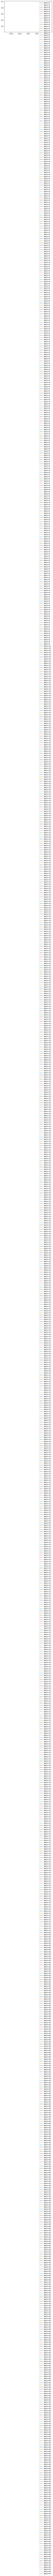

In [13]:
batch_list = [8, 16, 32, 64]
acc_by_batch_num = []

for batch_size in batch_list:
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
    
    class Net(nn.Module):    
        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(20, 255)
            self.fc2 = nn.Linear(255, 255)
            # self.fc3 = nn.Linear(255, 255)
            self.fc3 = nn.Linear(255, 10)
            # self.dropout1 = nn.Dropout2d(0.2)
            # self.dropout2 = nn.Dropout2d(0.2)
            # self.dropout3 = nn.Dropout2d(0.2)

        def forward(self, x):
            x = F.relu(self.fc1(x))
            # x = self.dropout1(x)
            x = F.relu(self.fc2(x))
            # x = self.dropout2(x)
            # x = F.relu(self.fc3(x))
            # x = self.dropout3(x)
            x = F.softmax(self.fc3(x), dim=1)
            return x
        
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    net = Net().to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01)
    epochs = 300
    
    train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []
 
    for epoch in range(epochs):
        train_loss, train_acc, val_loss, val_acc = 0, 0, 0, 0

        net.train()
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            train_loss += loss.item()
            acc = (outputs.max(1)[1] == labels).sum()
            train_acc += acc.item()
            loss.backward()      
            optimizer.step()
            avg_train_loss = train_loss / len(train_loader.dataset)
            avg_train_acc = train_acc / len(train_loader.dataset)

        net.eval()
        with torch.no_grad():
          for inputs, labels in valid_loader:        
              inputs, labels = inputs.to(device), labels.to(device)
              outputs = net(inputs)
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              acc = (outputs.max(1)[1] == labels).sum()
              val_acc += acc.item()
        avg_val_loss = val_loss / len(valid_loader.dataset)
        avg_val_acc = val_acc / len(valid_loader.dataset)

        print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                       .format(epoch+1, epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))

        train_loss_list.append(avg_train_loss)
        train_acc_list.append(avg_train_acc)
        val_loss_list.append(avg_val_loss)
        val_acc_list.append(avg_val_acc)
        
        plt.plot(avg_val_acc, label=f"batch={batch_size}")
        
    acc_by_batch_num.append(val_acc_list[-1])
    plt.legend()

In [ ]:
x = [i for i in range(1, 201)]
plt.plot(x, train_acc_list)
plt.plot(x, val_acc_list)

In [ ]:
plt.plot(x, train_loss_list)
plt.plot(x, val_loss_list)